In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Recommendation Engines

_Author: Alex Combs (NYC) _

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain what a recommendation engines is
- Explain the math behind recommendation engines
- Explain the types of recommendation engines and their pros and cons

<a id="what-is-a-recommendation-engine"></a>
## What is a recommendation engine?
---

At its most basic: A system designed to match users to things that they will like.

- The "things" can be products, brands, media, or even other people. 
- Ideally, they should be things the user doesn't know about. 
- **The goal is to rank all the possible things that are available to the user and to only present the top items**

<a id="why-bother"></a>
### Why bother?

- 1/4 to a 1/3 of consumer choices at Amazon are driven by personalized recommendations
- Netflix says there recommendation engine reduces churn saving the company in excess of $1 billion a year
- Hulu [has shown](http://tech.hulu.com/blog/2011/09/19/recommendation-system.html) that showing recommended TV shows results in over 3x more clicks than only showing the most popular TV shows.

<a id="who-uses-recommendation-systems"></a>
### Who uses recommendation systems?

- Netflix
- Pandora
- Hulu
- Tinder
- Facebook
- Barnes & Noble (receipts recommend other books)
- Target (sent directed ads based on motherhood predictions)

<a id="explicit-data-vs-implicit-data"></a>
### Explicit data vs Implicit data

#### Explicit
- Explicity given/pro-actively acquired
- Clear signals
- Cost associated with acquisition (time/cognitive)
- Limited and sparse data because of this


#### Implicit
- Provided/collected passively (digital exhaust)
- Signals can be difficult to interpret
- Enormous quantities

<a id="two-classical-recommendation-methods"></a>
### Two classical recommendation methods

- **Collaborative Filtering**: _(similar people)_
    - If you like the same 5 movies as someone else, you'll likely enjoy other movies they like.
    - There are two main types: (a) Find users who are similar and recommend what they like (**user-based**), or (b) recommend items that are similar to already-liked items (**item-based**).
   

- **Content-Based Filtering** _(similar items)_
    - If you enjoy certain characteristics of movies (e.g. certain actors, genre, etc.), you'll enjoy other movies with those characteristics.
    - Note this can easily be done using machine learning methods! Each movie can be decomposed into features. Then, for each user we compute a model -- the target can be a binary classifier (e.g. "LIKE"/"DISLIKE") or regression (e.g. star rating).

<a id="user-based-collaborative-filtering"></a>
## User-based Collaborative Filtering
---

We'll first look at user-based filtering. The idea behind this method is finding your taste **doppelgänger**. This is the person who is most similar to you based upon the ratings both of you have given to a mix of products.

<a id="so-lets-see-how-we-construct-it"></a>
## So, let's see how we construct it

We begin with what's called a utility matrix. This is a **user** (rows) x **product** (columns) matrix.

In [42]:
movies = ["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Jiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"]
users = [
    ("Chuck", 5, 4, None, None, None, 1),
    ("Nancy", 5, None, 4, None, 2, None),
    ("Anya", 4, 5, 5, None, 1, None),
    ("Divya", 1, None, 2, 5, 4, 5),
    ("Pat", 1, 1, 1, None, 3, 4),
]

users = pd.DataFrame(users, columns=movies)
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Jiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


***Check:*** If we want to find the most similar users, what do we need?

<a id="formula"></a>
If we want to find the users most similar to user A, we need a **similarity metric**. 

*(Ultimately, We want to predict missing values in the above matrix)*

One metric we can use is **cosine similarity**. Cosine similarity uses the cosine between two vectors to compute a scalar value that represents how closely related these vectors are. 


## $$
cos(\theta) = \frac{\vec{Chuck} \cdot \vec{Nancy}}{\left\| \vec{Chuck}\right\| \left\| \vec{Nancy}\right\| } \
= \frac{\sum{Chuck_i Nancy_i}}{\sqrt{\sum{Chuck_i^2}}\sqrt{\sum{Nancy_i^2}}}
$$


- Angle of $0^{\circ}$ (same direction): $\cos(0^{\circ}) = 1$. Perfectly similar.
- Angle of $90^{\circ}$ (orthogonal): $\cos(90^{\circ}) = 0$. Totally dissimilar.
- Angle of $180^{\circ}$ (opposite direction): $\cos(90^{\circ}) = -1$. Opposite.


Doesn't this sound a lot like the correlation coefficient? It turns out that cosine similarity is identical to the **uncentered correlation coefficient**! As a bonus, if the points are mean-centered, then this formula also depicts the **Pearson correlation coefficient**.

<a id="cosine-similarity-using-sci-kit-learn"></a>
## Cosine similarity using sci-kit learn

With that, let's calculate the cosine similarity of A against all other users. We'll start with B. We have a sparse matrix with lot's of missing values... what should we do?

In [43]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Jiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


In [9]:
users.mean(axis=1)

user
Chuck    3.333333
Nancy    3.666667
Anya     3.750000
Divya    3.400000
Pat      2.000000
dtype: float64

In [11]:
users.T

user,Chuck,Nancy,Anya,Divya,Pat
Friday the 13th,5.0,5.0,4.0,1.0,1.0
Nightmare on Elm St,4.0,NaN,5.0,NaN,1.0
Dawn of the Dead,NaN,4.0,5.0,2.0,1.0
Jiro Dreams of Sushi,NaN,NaN,NaN,5.0,NaN
180 South,NaN,2.0,1.0,4.0,3.0
Exit Through the Giftshop,1.0,NaN,NaN,5.0,4.0


In [44]:
# De-mean the rows to "normalize" each user's reviews (meaning: subtract mean of each user, from each user)
# Why?  We want to make "0" a neutral value for each user (or each row)
# This can be called "mean-centering"
def mean_center_users(df):
    return(df.T - df.mean(axis=1)).T

users_mc = mean_center_users(users)
users_mc

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Jiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1.666667,0.666667,NaN,NaN,NaN,-2.333333
Nancy,1.333333,NaN,0.333333,NaN,-1.666667,NaN
Anya,0.250000,1.250000,1.250000,NaN,-2.750000,NaN
Divya,-2.400000,NaN,-1.400000,1.6,0.600000,1.600000
Pat,-1.000000,-1.000000,-1.000000,NaN,1.000000,2.000000


Now let's calculate the (cosine) similarity for...

1. Chuck vs. Nancy
2. Chuck vs. Divya

Do these results make sense??

In [45]:
users_mc.fillna(value=0,inplace = True)

In [46]:
Chuck_mc = users_mc.loc['Chuck',:].values.reshape(1,-1)
Nancy_mc = users_mc.loc['Nancy',:].values.reshape(1,-1)
Divya_mc = users_mc.loc['Divya',:].values.reshape(1,-1)

print('Chuck vs. Nancy = ', cosine_similarity(Chuck_mc, Nancy_mc))
print('Chuck vs. Divya = ', cosine_similarity(Chuck_mc, Divya_mc))

Chuck vs. Nancy =  [[0.34942828]]
Chuck vs. Divya =  [[-0.72302567]]


In [47]:
users_mc.loc['Chuck',:].values.reshape(1,-1)

array([[ 1.66666667,  0.66666667,  0.        ,  0.        ,  0.        ,
        -2.33333333]])

Next let's get the similarities between _all_ users.

In [48]:
sim_matrix = cosine_similarity(users_mc)  #takes the same no. of rows as users or users_mc, whose index is user names
users_sim = pd.DataFrame(sim_matrix, columns = users_mc.index, index = users_mc.index)
users_sim

user,Chuck,Nancy,Anya,Divya,Pat
user,,,,,
Chuck,1.000000,0.349428,0.129503,-0.723026,-0.840673
Nancy,0.349428,1.000000,0.752993,-0.594588,-0.545545
Anya,0.129503,0.752993,1.000000,-0.335791,-0.593080
Divya,-0.723026,-0.594588,-0.335791,1.000000,0.739574
Pat,-0.840673,-0.545545,-0.593080,0.739574,1.000000


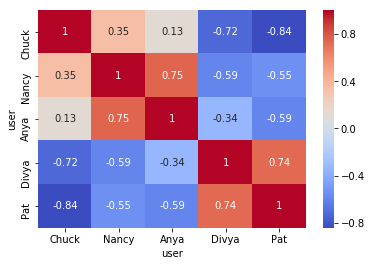

In [50]:
sns.heatmap(users_sim, annot=True, cmap='coolwarm');

Most similar tastes are Anya and Nancy. Least similar tastes are Pat and Chuck.

Also note that Nancy has only positive similarities, with Chuck and Anya, hence we choose to only analyse them in the below.

<a id="but-how-do-we-predict-the-rating-of-an-item-for-a-user"></a>
## But how do we predict the rating of an item for a user?

**Will Nancy like Nightmare on Elm St?**

To answer this we will predict Nancy's rating using the _weighted results of the other users_.

This is where a little art comes in... let's make the decision to only include users that have a positive similarity score relative to Nancy.

In [ ]:
users_sim

The gist of what we want to do is given by the following formulaL

$$\frac{(\text{Chuck-Nancy sim})(\text{Chuck rating}) + (\text{Nancy-Anya sim})(\text{Anya ratings})}{\text{sum of similarities}}$$

$$= \frac{0.349428 \cdot (4) + 0.129503 (or 0.75299 rather?) \cdot (5)}{0.349428 + 0.129503 (or 0.75299 rather?)} = 4.68$$

Here's the procedure for recommending movie X to Nancy:

1. Get Nancy's similarity scores to all other **users**.
2. Only keep positive similarities.  (This step can be tweaked!)
3. Convert Nancy's similarities to _weights_ by dividing each similarity by the _total_ similarity.
4. Get all the other users' ratings for movie X.
5. Weight each user's rating by Nancy's similarity to that user.

In [51]:
# 1-2. Get Nancy's similarity scores
nancy_sim = users_sim['Nancy'].drop('Nancy')
nancy_sim

user
Chuck    0.349428
Anya     0.752993
Divya   -0.594588
Pat     -0.545545
Name: Nancy, dtype: float64

In [52]:
# get only positive sim
nancy_sim = nancy_sim[nancy_sim>0]  #may wanna set threshold here, cos max sim value could just be 0.03 which is peanuts
nancy_sim

user
Chuck    0.349428
Anya     0.752993
Name: Nancy, dtype: float64

In [53]:
# 3. Turn Nancy's similarity scores to weights
nancy_weights = nancy_sim.values/np.sum(nancy_sim.values)
nancy_weights

array([0.3169643, 0.6830357])

In [54]:
# 4. Get elm_st_ratings
elm_st_ratings = users['Nightmare on Elm St'].drop('Nancy')
elm_st_ratings

user
Chuck    4.0
Anya     5.0
Divya    NaN
Pat      1.0
Name: Nightmare on Elm St, dtype: float64

In [55]:
# get only the users who are in nancy_sim, who like elm st
elm_st_ratings = elm_st_ratings.loc[nancy_sim.index]
elm_st_ratings

user
Chuck    4.0
Anya     5.0
Name: Nightmare on Elm St, dtype: float64

In [58]:
# 5. Weight each user's rating by Nancy's similarity to that user.
# HINT: this will be the dot product between the users's rating vector
# and Nancy's similarity/weight vector
np.dot(elm_st_ratings.values,nancy_weights)

4.683035701380843

How would we get expected ratings for all of the movies that Nancy has not seen?

Just use the above procedure for _all_ movies!  We can use a bit linear algebra (just matrix multiplication) to do this very compactly.

##### note that the above all were done with pandas which is slow. We should use numpy hence faster

In [63]:
ratings = users.T
ratings = ratings[ratings['Nancy'].isnull()]
ratings = ratings.drop('Nancy',axis=1)
ratings

user,Chuck,Anya,Divya,Pat
Nightmare on Elm St,4.0,5.0,NaN,1.0
Jiro Dreams of Sushi,NaN,NaN,5.0,NaN
Exit Through the Giftshop,1.0,NaN,5.0,4.0


In [64]:
ratings = ratings[nancy_sim.index]
ratings

user,Chuck,Anya
Nightmare on Elm St,4.0,5.0
Jiro Dreams of Sushi,NaN,NaN
Exit Through the Giftshop,1.0,NaN


In [65]:
# dot product
nancy_ratings = np.dot(ratings.fillna(0).values, nancy_weights)
nancy_ratings

array([4.6830357, 0.       , 0.3169643])

Hence we would recommend the 1st movie most: nightmare elm st.

In [66]:
# this is what this line does 
ratings.fillna(0).values

array([[4., 5.],
       [0., 0.],
       [1., 0.]])

#### Check: What might be some problems with user-based filtering?

- Frequently-liked items will necessarily have users who like all kinds of other items. So, recommendations based on frequently-liked items may be inaccurate.

- User-based filtering also suffers from the **cold-start problem**. If a new user joins and has very few likes, then it is difficult to pair them with a similar user.

- Lastly, suppose that a user with few likes adds a new like. This may significantly change the recommendations. Hence, as users add likes, the recommendations must be continually and quickly updated.

In practice, there is a type of collaborative filtering that can perform much better than user-based filtering: **item-based filtering**.

<a id="item-based-collaborative-filtering"></a>
## Item-based Collaborative Filtering

In item-based filtering, we are trying to find similarities across items rather than users.

> Rather than looking for _similar users_, we are going to look for _similar movies/items_.  Similar items are determined by user rating patterns.

Basically, everything here is the same as in user-based collaborative filtering, except we will deal with the _transpose_ or our data matrix.

Just as in user-based filtering, we need to center our values by row.

In [73]:
# get sim matrix not by users, but by items/movies

# unlike the above user-based collab filtering, here we cosine_sim the transpose, 
# hence sim_matrix_item will have same no. of rows as users.T (not users nor users_mc), whose index is movie titles
sim_matrix_item = cosine_similarity(mean_center_users(users.T).fillna(0))
movies_sim = pd.DataFrame(sim_matrix_item, columns= users.T.index, index = users.T.index)
movies_sim

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Jiro Dreams of Sushi,180 South,Exit Through the Giftshop
Friday the 13th,1.000000,0.635369,0.771517,0.0,-0.709208,-0.773492
Nightmare on Elm St,0.635369,1.000000,0.859338,0.0,-0.557007,-0.358974
Dawn of the Dead,0.771517,0.859338,1.000000,0.0,-0.848528,-0.322252
Jiro Dreams of Sushi,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
180 South,-0.709208,-0.557007,-0.848528,0.0,1.000000,0.430414
Exit Through the Giftshop,-0.773492,-0.358974,-0.322252,0.0,0.430414,1.000000


The nearest movies to _Nightmare on Elm St_ are _Firday the 13th_ and _Dawn of the Dead_. To calculate Nancy's rating for our _Nightmare on Elm St_, we have the following equation:

** (1st closest cosine sim movie x Nancy's rating + 2nd closest cosine sim movie x Nancy's product rating) / (sum of 1st and 2nd's cosine sims) **

$$\frac{(\text{Dawn of Dead sim})(\text{Nancy's rating}) + (\text{Friday 13 sim})(\text{Nancy's rating})}{\text{sum of similarities}} = \frac{0.859338 \cdot (4) + 0.635369 \cdot (5)}{0.859338 + 0.635369} = 4.43$$

Here's the procedure for recommending movie X to Nancy:

1. Get movie X's similarity scores to all other **movies**.
2. Only keep positive similarities.  (This step can be tweaked!)
3. Convert movie X's similarities to _weights_ by dividing each similarity by the _total_ similarity.
4. Get Nancy's ratings for all other movies.
5. Weight Nancy's ratings for all other movies by movie X's similarity to those movies.

In [77]:
# 1-2. Get Elm St similarity scores
elm_st_sim = movies_sim['Nightmare on Elm St'].drop('Nightmare on Elm St')
elm_st_sim = elm_st_sim[elm_st_sim>0]
elm_st_sim

Friday the 13th     0.635369
Dawn of the Dead    0.859338
Name: Nightmare on Elm St, dtype: float64

In [78]:
# 3. Turn Elm St similarity scores to weights
elm_st_weights = elm_st_sim.values/np.sum(elm_st_sim.values)
elm_st_weights

array([0.42507927, 0.57492073])

In [82]:
# 4. Get Nancy's_ratings
nancy_ratings = users.T['Nancy'].loc[elm_st_sim.index]
nancy_ratings

Friday the 13th     5.0
Dawn of the Dead    4.0
Name: Nancy, dtype: float64

In [84]:
# 5. Weight each user's rating by Nancy's similarity to that user.
np.dot(nancy_ratings.values,elm_st_weights)

4.425079267585091

<a id="content-based-filtering"></a>
## Content-based Filtering

Finally, there is another method called content-based filtering. In content-based filtering, the items are broken down into "feature baskets". These are the characteristics that represent the item. The idea is that if you like the features of song X, then finding a song that has similar characteristics will tell us that you're likely to like it as well.


The quintessential example of this is Pandora with it's musical genome. Each song is rated on ~450 characteristics by a trained musicologist.

<a id="example"></a>
## Example 
Content-based filtering begins by mapping each item into
a feature space. Both users and items are represented by
vectors in this space.
Item vectors measure the degree to which the item is
described by each feature, and user vectors measure a
user’s preferences for each feature.
Ratings are generated by taking dot products of user &
item vectors. 

<img src="http://i.imgur.com/NzHksKK.png">

---

Let's look at a music database as an example

In [85]:
from sklearn.preprocessing import StandardScaler
import pandas as pd, numpy as np
import sqlite3

conn = sqlite3.connect("./db.sqlite3")
conn.text_factory = lambda x: str(x, 'latin1')

sql = """
SELECT r.userID, r.artistID, r.tagID, 
a.name AS artist,
t.tagValue as genre
FROM rec_user_artist_tags r
LEFT JOIN rec_artists a on r.artistID = a.id
LEFT JOIN rec_tags t on r.tagID = t.tagID
WHERE a.name NOT NULL
LIMIT 15000
"""
# from the rec_user_artist_tags table, do a sql join bla bla...

artists = pd.read_sql(sql, con=conn)
artist_genre = artists.groupby(["artist", "genre"]).size().sort_values(ascending=False).unstack().fillna(0)

In [91]:
# or...
sql2 = '''
SELECT *
FROM
rec_artists a
'''
# where * is wildcard
pd.read_sql(sql2,con=conn).head()

,index,id,name,url,pictureURL
0,0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [88]:
artists.head()

,userID,artistID,tagID,artist,genre
0,2,52,13,Morcheeba,chillout
1,2,52,15,Morcheeba,downtempo
2,2,52,18,Morcheeba,electronic
3,2,52,21,Morcheeba,trip-hop
4,2,52,41,Morcheeba,female vovalists


In [86]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
userID      15000 non-null int64
artistID    15000 non-null int64
tagID       15000 non-null int64
artist      15000 non-null object
genre       15000 non-null object
dtypes: int64(3), object(2)
memory usage: 586.0+ KB


In [87]:
artist_genre.head()

genre,00,00s,10s,1970,1970s,1973,1978,1979,1979 songs,1980,...,wooooooaaaaahh,world,world music,worst lyrics ever,x factor,xtina,xtina love,yildirim turker,you,zadrotstvo
artist,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(hed) Planet Earth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
*NSYNC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**What's happening here?** . Each artist was "tagged" by users as belonging to a certain genre.  

For each artist, the "tags" were counted and sorted above.  For example, Britney Spears was tagged as "pop" 12 times, "dance" as 7 times, etc.

Is this best way to construct feature baskets?  Maybe not, but we are going to go with it today!

### Use Case 1: Basic Similarity Metric: "Give me something like Linkin Park!"

In [98]:
artist_sim = pd.DataFrame(
    #notice we don't de-mean here (unlike above eg), cos values here are either 1 or 0, not eg. a scale of 1-5 
    cosine_similarity(artist_genre),
    columns=artist_genre.index,
    index=artist_genre.index
)
artist_sim.head()

artist,!!!,#####,(hed) Planet Earth,*NSYNC,+44,12 Stones,1200 Micrograms,12012,13th Floor Elevators,2 Unlimited,...,å±±ä¸æºä¹,æ°å®¿ã²ãã«ã,æµå´ããã¿,æ¸ æ¥,è éããå­,é -MIYAVI-,é«æ©å¹¸å®,é¬¼æã¡ã²ã,é·ºå·£è©©é,íì
artist,,,,,,,,,,,,,,,,,,,,,
!!!,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,1.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(hed) Planet Earth,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
*NSYNC,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+44,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# artist_sim['Linkin Park'].sort_values(ascending=False).head(10)
# artist_sim['Nickelback'].sort_values(ascending=False).head(10)
# artist_sim['*NSYNC'].sort_values(ascending=False).head(10)
# artist_sim['2Pac'].sort_values(ascending=False).head(10)
artist_sim['Justin Bieber'].sort_values(ascending=False).head(10)

artist
Justin Bieber         1.000000
Craig David           0.753778
Jason DerÃ¼lo         0.692902
The Pussycat Dolls    0.667298
M. Pokora             0.648675
Kristinia DeBarge     0.639602
Jeremih               0.639602
Tamta                 0.639602
Ne-Yo                 0.630900
Diyana                0.615457
Name: Justin Bieber, dtype: float64

### Use Case 2: Profile-Based Recommendations: "Recommend me something based on my "profile"

In [109]:
genres = artist_genre.columns.tolist()
genres[:10]

['00',
 '00s',
 '10s',
 '1970',
 '1970s',
 '1973',
 '1978',
 '1979',
 '1979 songs',
 '1980']

In [119]:
# initialise my preferences
my_profile = pd.Series(np.zeros(len(genres)), index=artist_genre.columns)

# set my preferences
my_profile['rock'] = 4
my_profile['world'] = 3
my_profile['electronic'] = 1
my_profile['folk'] = 3

# guess top 10 recommendations
recommendations = np.dot(artist_genre, my_profile) #or add '.values' at the back also can. eg. artist_genre.values, my_profile.values
pd.Series(recommendations, index = artist_genre.index).sort_values(ascending=False)[:10]

artist
U2                     32.0
The Beatles            28.0
Evanescence            24.0
Bon Jovi               24.0
Linkin Park            24.0
Queen                  24.0
My Chemical Romance    24.0
Tokio Hotel            20.0
The Cure               20.0
Paramore               16.0
dtype: float64

<a id="conclusion"></a>
## Conclusion
---

We have looked at the major types of recommender systems in this lesson. Let's quickly wrap up by looking at the pros and cons of each.

#### Collaborative Filtering 

Pros:
- No need to hand craft features

Cons:
- Needs a large existing set of ratings (cold-start problem)
- Sparsity occurs when the number of items far exceeds what a person could purchase

#### Content-based Filtering

Pros:
- No need for a large number of users

Cons:
- Lacks serendipity
- May be difficult to generate the right features
- Hard to create cross-content recommendations (different feature spaces)

In fact, the best solution -- and the one most likely in use in any large-scale, production system is a combination of both of these. This is known as a **hybrid system**. By combining the two systems, you can get the best of both worlds.

<a id="extra-practice"></a>
## Extra Practice
---

Using the [MovieLens dataset](https://grouplens.org/datasets/movielens/100k/), experiment with building a recommender system. Check the "Additional Resources" for more information and some considerations on how to evaluate these systems.

<a id="additional-resources"></a>
## Additional Resources
---

- [Wharton Study of Recommender Systems](http://knowledge.wharton.upenn.edu/article/recommended-for-you-how-well-does-personalized-marketing-work/)
- [Netflix Recommendations](https://www.rtinsights.com/netflix-recommendations-machine-learning-algorithms/)
- [Netflix Paper](http://dl.acm.org/citation.cfm?id=2843948)
- [NY Times Rec System](https://open.blogs.nytimes.com/2015/08/11/building-the-next-new-york-times-recommendation-engine)
- [Evaluating Rec Systems](https://www.quora.com/How-do-you-measure-and-evaluate-the-quality-of-recommendation-engines)
- Tutorials:
    - [DataCamp](https://www.datacamp.com/community/tutorials/recommender-systems-python)
    - [Kaggle](https://www.kaggle.com/gspmoreira/recommender-systems-in-python-101)